In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
real = pd.read_csv("./GenerateData/Adult/Adult_train_ctgan.csv")
fake = pd.read_csv("./GenerateData/fake_tablegan.csv")
fake = fake.astype('int')
fake.head()

,Age,WorkClass,fnlwgt,Education,E_Num,MaritalStatus,Occupation,Relationship,Race,Gender,CapitalGain,CapitalLoss,Hours,NativeCountry,Income
0,36,0,172591,13,12,3,4,2,0,1,605,2,53,29,0
1,65,3,104016,12,14,1,3,2,0,1,3477,22,39,0,1
2,22,3,195343,8,5,1,10,1,0,0,209,165,44,0,0
3,22,0,169809,14,11,0,1,3,0,1,46,3,52,0,0
4,41,0,239224,8,10,0,1,0,0,0,18,0,35,0,1


In [8]:
real.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,27.0,0.0,177119.0,12.0,10.0,2.0,3.0,3.0,0.0,1.0,0.0,0.0,44.0,0.0,0.0
1,27.0,0.0,216481.0,13.0,13.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,40.0,0.0,0.0
2,25.0,0.0,256263.0,11.0,12.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,40.0,0.0,0.0
3,46.0,0.0,147640.0,2.0,3.0,0.0,8.0,0.0,3.0,0.0,0.0,1902.0,40.0,0.0,0.0
4,45.0,0.0,172822.0,6.0,7.0,2.0,8.0,1.0,0.0,0.0,0.0,2824.0,76.0,0.0,1.0


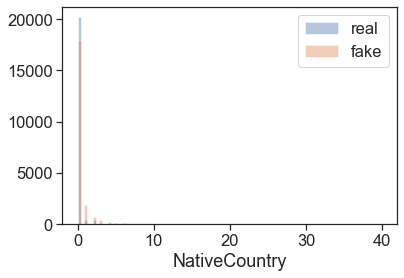

In [22]:
#sns.set(style="ticks", color_codes=True,font_scale=1.5)
sns.distplot(real['native-country'],bins=100,kde = False,label='real')
sns.distplot(fake['NativeCountry'],bins=100,kde = False,label='fake')
plt.legend(loc='upper right')

In [ ]:
def load_data():
    real = pd.read_csv("./GenerateData/adult_tain.csv")
    fake = pd.read_csv("./GenerateData/fake_tablegan.csv")
    len_ = real.shape[0]
    fake= fake[0:len_]
    real['data']=1
    fake['data']= 0
    df = pd.concat([real,fake],axis=0)
    con_vars =[]
    cat_vars =  real.columns 
    return df,cat_vars
df,cat_vars = load_data()

In [ ]:
#duplicate_1 = pd.read_csv("duplicate_1.csv")
#column = 'Age'
def plot_distribution_real_vs_fake(df,cat_vars,file_name):
    sns.set(style="ticks", color_codes=True,font_scale=1.5)
    fig = plt.figure(figsize=(20,10))
    cols = 5
    rows = math.ceil(float(real.shape[1]) / cols)
    for i,column in enumerate(cat_vars): 
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_yticks([])
        sns.countplot(x=column,data = df, hue="data",ax=ax)

        #plt.grid(True)

    plt.subplots_adjust(hspace=0.3, wspace=0.2)
    plt.savefig("./figure/"+ file_name +".png",dpi=600)
plot_distribution_real_vs_fake(df,cat_vars,file_name = 'adult_50epoch')

In [ ]:
real = pd.read_csv("./GenerateData/health_tain.csv")
fake = pd.read_csv("./GenerateData/Health_syn_epoch300_seed0_delFalse.csv")

In [ ]:
#health
con_vars = ['LabCount_total','LabCount_months','DrugCount_total','DrugCount_months'
          ,'PayDelay_total','PayDelay_max','PayDelay_min']
cat_vars = [columns for columns in fake.columns if columns not in con_vars]

In [ ]:
for i in con_vars:
    fake.loc[(fake[i] < 0),i] = 0

In [ ]:
con_columns = ['lsat','gpa']
cat_columns = ['race','resident','college','year','gender','admit','data']

In [ ]:
fake = fake.round({'lsat': 0, 'gpa': 2})

In [ ]:
sns.set(style="ticks", color_codes=True,font_scale=1.5)
for column in  fake.columns:
    if column in con_vars:
        g= sns.FacetGrid(df,col="data", height=3.5, aspect=1.2)
    #sns.catplot(= "data",y = "college",data = df,kind="bar")
        g.map(sns.distplot, column)
        plt.savefig('./figure/lawschool/'+column + '.png', dpi=600)
        plt.show()
    else:
        g= sns.FacetGrid(df,col="data", height=3.5, aspect=1.2)
    #sns.catplot(= "data",y = "college",data = df,kind="bar")
        g.map(sns.countplot, column)
        plt.show()

#plt.savefig('./MyFirstSynthesizer/figure/Hours_marginal_dim.eps')

In [ ]:
#画出每个feature的分布，分析一下数据特性
def plot_data(data,c_index):
    fig = plt.figure(figsize=(20,15))   #设定图像尺寸
    cols = 5
    rows = math.ceil(float(data.shape[1]) / cols)   #train_df.shape[1]=15, math.ceil将数字四舍五入到大的整数，所以，rows= 3
    for i in range(13):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(data.columns[i])
        if i in c_index:
            data.iloc[:,i].hist(axes=ax,density=True,bins=100)
            plt.xticks(rotation="vertical")
        else:
            data.iloc[:,i].value_counts().plot(kind="bar", axes=ax)
    plt.subplots_adjust(hspace=0.7, wspace=0.2)
    plt.savefig('./figure/fake.png',dpi=600)

In [ ]:
real['Age'].hist(density=True,bins=300)
plt.xticks(rotation="vertical")
plt.title('Histogram of CapitalGain, real')
plt.grid(True)
plt.show()
#plt.savefig('./figure/fake_CapitalGain.png',dpi=600)

In [ ]:
c_index = []
plot_data(fake,c_index)

In [ ]:
c_index = [0,1,2,3]
plot_data(fake,c_index)